In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


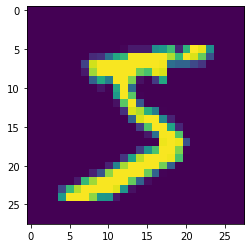

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
x_train = x_train.reshape(-1, 28, 28, 1)
plt.imshow(x_train[0,:,:,0])
x_train = x_train / 127.5 - 1
x_valid = x_valid / 127.5 - 1

In [3]:
encoder_input = tf.keras.Input(shape=(28,28,1))

c1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu', use_bias=True)(encoder_input)
c2 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu', use_bias=True)(c1)

m1 = tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=(2,2))(c2)

c4 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu', use_bias=True)(m1)
c5 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu', use_bias=True)(c4)

f1 = tf.keras.layers.Flatten()(c5)
d1 = tf.keras.layers.Dense(128, activation='relu')(f1)
d2 = tf.keras.layers.Dense(14*14*64)(d1)
r1 = tf.keras.layers.Reshape(target_shape=[14,14,64])(d2)

c10 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu', use_bias=True)(r1)
c11 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu', use_bias=True)(c10)

u1 = tf.keras.layers.UpSampling2D(size = (2,2))(c11)

c13 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu', use_bias=True)(u1)
c14 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1, 1), padding='SAME', activation='relu', use_bias=True)(c13)

decoder_output = tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1, 1), activation='tanh', padding='SAME', use_bias=True)(c14)

In [4]:
ae = tf.keras.Model(inputs = encoder_input,outputs = decoder_output)
ae.compile(optimizer = tf.keras.optimizers.Adam(0.0005), loss=tf.keras.losses.MeanSquaredError())
ae.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0     

In [5]:
history = ae.fit(x = x_train, y = x_train, batch_size=32, epochs=100, validation_data=(x_valid,x_valid))

Epoch 1/100
1875/1875 [==============================] - 42s 6ms/step - loss: 0.1220 - val_loss: 0.0157
Epoch 2/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0143 - val_loss: 0.0119
Epoch 3/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0115 - val_loss: 0.0113
Epoch 4/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0102 - val_loss: 0.0096
Epoch 5/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 6/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 7/100
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 8/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0080 - val_loss: 0.0081
Epoch 9/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0078 - val_loss: 0.0084
Epoch 10/100
1875/1875 [==============================] - 11s 6m

In [6]:
pred = ae.predict(x_valid)

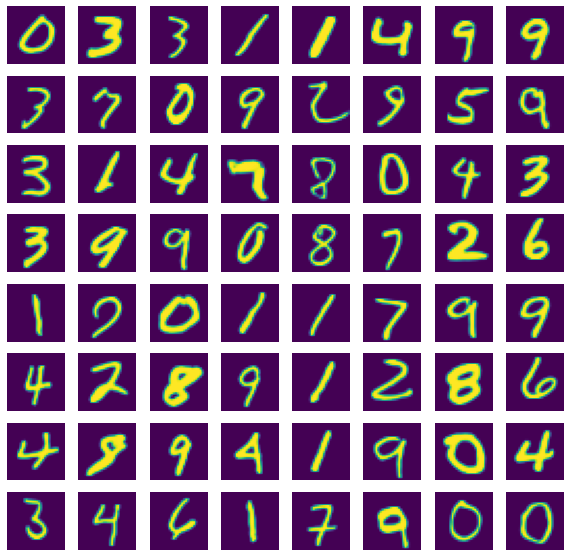

In [7]:
fig = plt.figure(figsize = (10,10))
for i in range(64):
    vissamp = np.random.randint(low=0,high=x_valid.shape[0])
    sp = fig.add_subplot(8,8,i+1)
    t = sp.imshow(pred[vissamp,:,:,0])
    plt.axis('off')

dict_keys(['loss', 'val_loss'])


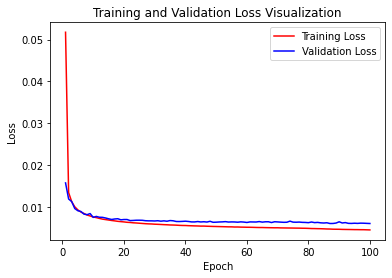

In [8]:
history_dict = history.history
print(history_dict.keys())

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epoch = range(1,len(loss)+1)

plt.plot(epoch,loss,'r',label='Training Loss')
plt.plot(epoch,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss Visualization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()